In [12]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model


In [3]:
df = pd.read_csv('C:\\Users\\VENKA\\Desktop\\Data Science\\Project\\concrete\\notebook\\concrete_cleaned.csv')

In [4]:
df

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Strength,cement_water_ratio,average_aggregate
0,42.100000,163.800000,5.700000,3.0,7.75,0.922695,919.4
1,42.100000,163.800000,5.700000,14.0,17.82,0.922695,919.4
2,42.100000,163.800000,5.700000,28.0,24.24,0.922695,919.4
3,42.100000,163.800000,5.700000,56.0,32.85,0.922695,919.4
4,42.100000,163.800000,5.700000,100.0,39.23,0.922695,919.4
...,...,...,...,...,...,...,...
1000,99.005628,97.619592,5.906120,28.0,21.75,1.487685,895.5
1001,80.472420,98.631933,6.989811,28.0,39.09,2.145946,887.0
1002,75.866275,84.534441,7.383577,3.0,24.39,2.500000,828.5
1003,20.729601,63.881059,12.918932,7.0,50.51,3.575342,896.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Blast Furnace Slag  1005 non-null   float64
 1   Fly Ash             1005 non-null   float64
 2   Superplasticizer    1005 non-null   float64
 3   Age                 1005 non-null   float64
 4   Strength            1005 non-null   float64
 5   cement_water_ratio  1005 non-null   float64
 6   average_aggregate   1005 non-null   float64
dtypes: float64(7)
memory usage: 55.1 KB


In [6]:
df.columns

Index(['Blast Furnace Slag', 'Fly Ash', 'Superplasticizer', 'Age', 'Strength',
       'cement_water_ratio', 'average_aggregate'],
      dtype='object')

In [8]:
col_names = ['Blast Furnace Slag', 'Fly Ash', 'Superplasticizer', 'Age', 'cement_water_ratio', 'average_aggregate']
target_col = ['Strength']
X = df[col_names]    
y = df[target_col]

In [9]:
X

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,cement_water_ratio,average_aggregate
0,42.100000,163.800000,5.700000,3.0,0.922695,919.4
1,42.100000,163.800000,5.700000,14.0,0.922695,919.4
2,42.100000,163.800000,5.700000,28.0,0.922695,919.4
3,42.100000,163.800000,5.700000,56.0,0.922695,919.4
4,42.100000,163.800000,5.700000,100.0,0.922695,919.4
...,...,...,...,...,...,...
1000,99.005628,97.619592,5.906120,28.0,1.487685,895.5
1001,80.472420,98.631933,6.989811,28.0,2.145946,887.0
1002,75.866275,84.534441,7.383577,3.0,2.500000,828.5
1003,20.729601,63.881059,12.918932,7.0,3.575342,896.0


In [10]:
y

,Strength
0,7.75
1,17.82
2,24.24
3,32.85
4,39.23
...,...
1000,21.75
1001,39.09
1002,24.39
1003,50.51


In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 16)
train_X_poly, train_y_poly, test_X_poly, test_y_poly = (None,) * 4
train_y = train_y[target_col[0]]
test_y = test_y[target_col[0]]

In [13]:
evaluation = {"Metrics" : ['Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R2 score', 'CV-mean']}
def evaluate_model(name, train_X, train_y, test_X, test_y, types, alg, plot=True):
    global evaluation, pred
    
    alg.fit(train_X, train_y)
    print(f"Score: {alg.score(test_X, test_y)}")
    if plot:
        fig, axes = plt.subplots(2, 1, figsize=(20, 10))
        try:
            if types == "Coefs":
                print(f"Intercept: {alg.intercept_}")
                try:
                    coefs = pd.DataFrame({"coefs" : alg.coef_, "col" : col_names})
                except:
                    coefs = pd.DataFrame({"coefs" : alg.coef_[0], "col" : col_names})
                sns.barplot(x="col", y="coefs", data=coefs, ax=axes[1]);
            else:
                features = pd.DataFrame({"features" : alg.feature_importances_, "col" : col_names})
                sns.barplot(x="col", y="features", data=features, ax=axes[1]);
        except:
            pass
    else:
        plt.figure(figsize=(20,5));
        axes = [None]

    pred = alg.predict(test_X)
    rmsecm = np.sqrt(metrics.mean_squared_error(test_y,pred))
    mae = mean_absolute_error(test_y, pred)
    mse = mean_squared_error(test_y, pred)
    r2 = r2_score(test_y, pred)

    p = pd.DataFrame(pred, columns=[0])
    p["Type"] = "Predictions"
    p["n"] = list(range(p.shape[0]))
    t = test_y.copy()
    t = t.reset_index().set_index("index")
    t.columns = [0]
    t["Type"] = "Actual"
    t = t[t[0] != "Actual"]
    t["n"] = list(range(p.shape[0]))
    x = pd.concat([p,t], axis=0).reset_index()
    sns.lineplot(x="n", y=0, hue="Type", data=x, markers=["o", "o"], style="Type", ax=axes[0]);
    
    cv = cross_val_score(alg, X, y, cv=10)
    cv_mean = cv.ravel().mean()
    
    evaluation[name] = [rmsecm, mae, mse, r2, cv_mean]
    df_ev = pd.DataFrame(evaluation)
    plt.show()
    return df_ev, cv

Score: 0.6709972764087837
Intercept: 44.13050737995335


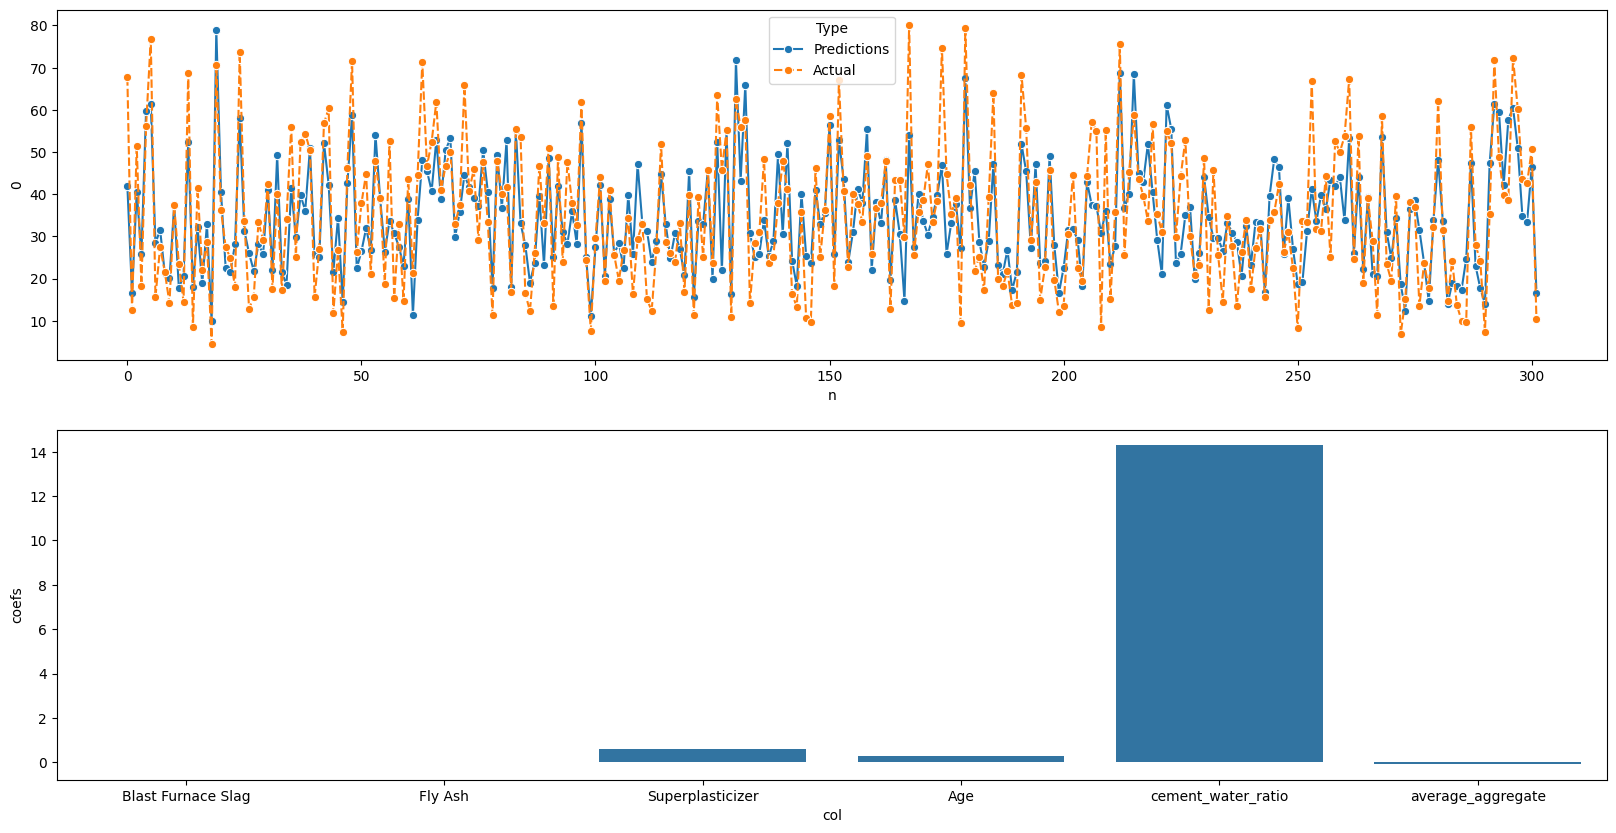

,Multiple Regression
Metrics,
Root Mean Squared Error (RMSE),9.724667
Mean Absolute Error (MAE),7.712430
Mean Squared Error (MSE),94.569156
R2 score,0.670997
CV-mean,0.496780


In [14]:
lr = linear_model.LinearRegression()
evaluation, cv_scores = evaluate_model("Multiple Regression", train_X, train_y, test_X, test_y, "Coefs", lr)
evaluation.set_index("Metrics")

[0.086924   0.65602716 0.55788836 0.62967804 0.65898998 0.43323068
 0.44297821 0.68772654 0.24620386 0.56814977]
Average score: 50.0%


C:\Users\VENKA\AppData\Local\Temp\ipykernel_32576\4287075302.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv_scores);


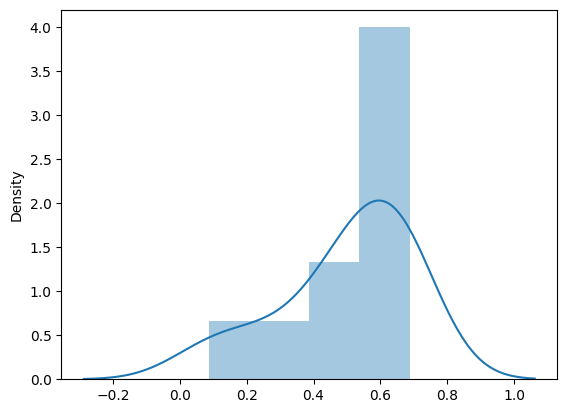

In [19]:
print(cv_scores)
sns.distplot(cv_scores);
print(f"Average score: {round(cv_scores.mean(),2)*100}%")

Score: 0.6707575401060617
Intercept: 44.71588499424095


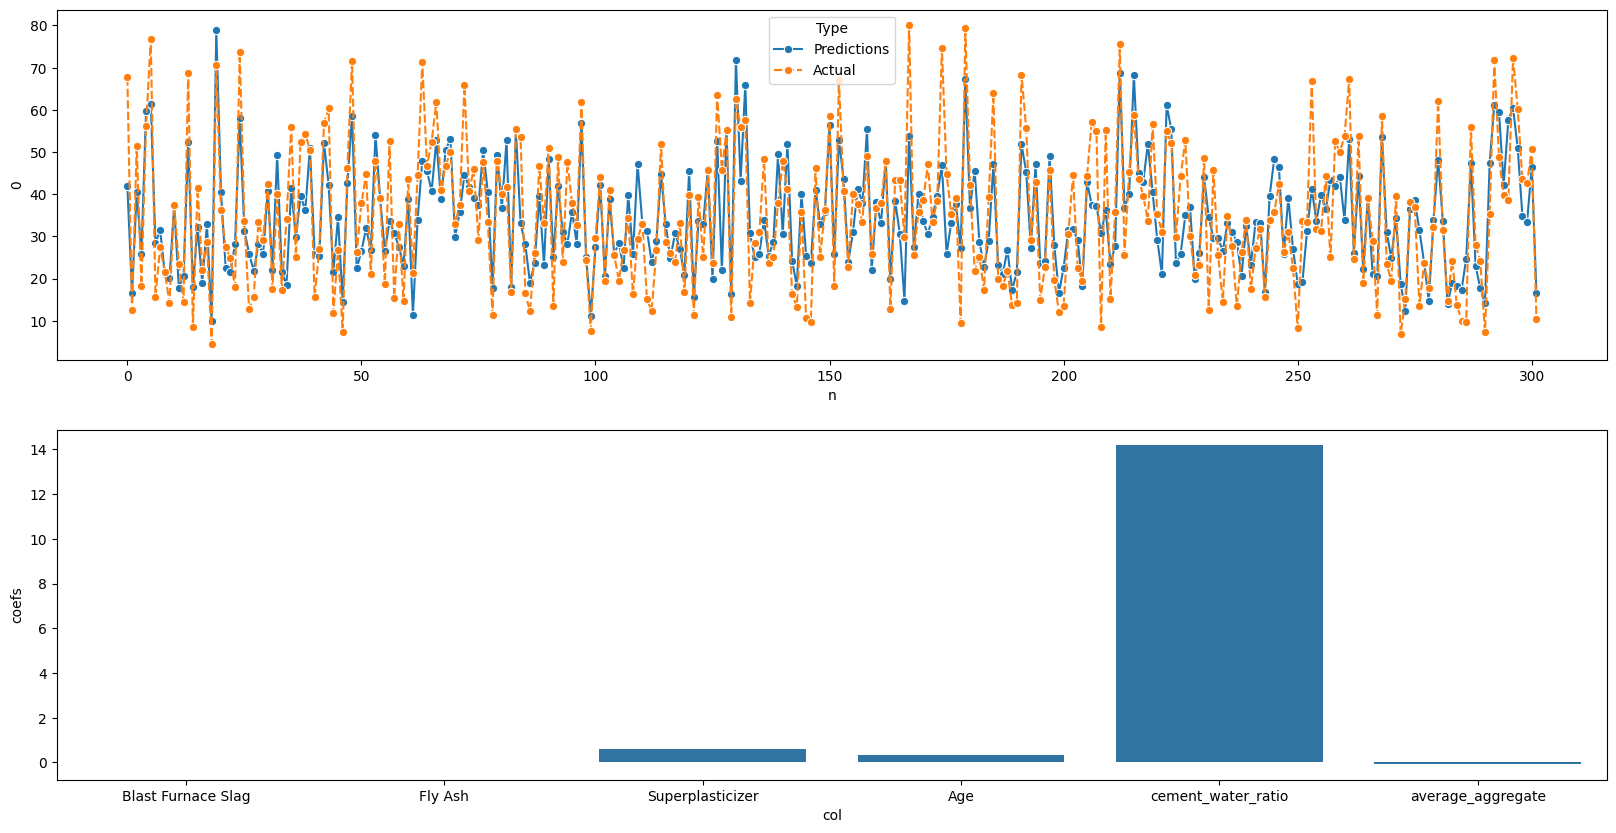

,Multiple Regression,Ridge
Metrics,,
Root Mean Squared Error (RMSE),9.724667,9.728210
Mean Absolute Error (MAE),7.712430,7.716194
Mean Squared Error (MSE),94.569156,94.638066
R2 score,0.670997,0.670758
CV-mean,0.496780,0.496955


In [20]:
rg = linear_model.Ridge()
evaluation, cv_scores = evaluate_model("Ridge", train_X, train_y, test_X, test_y, "Coefs", rg)
evaluation.set_index("Metrics")

Score: 0.7786201357424584


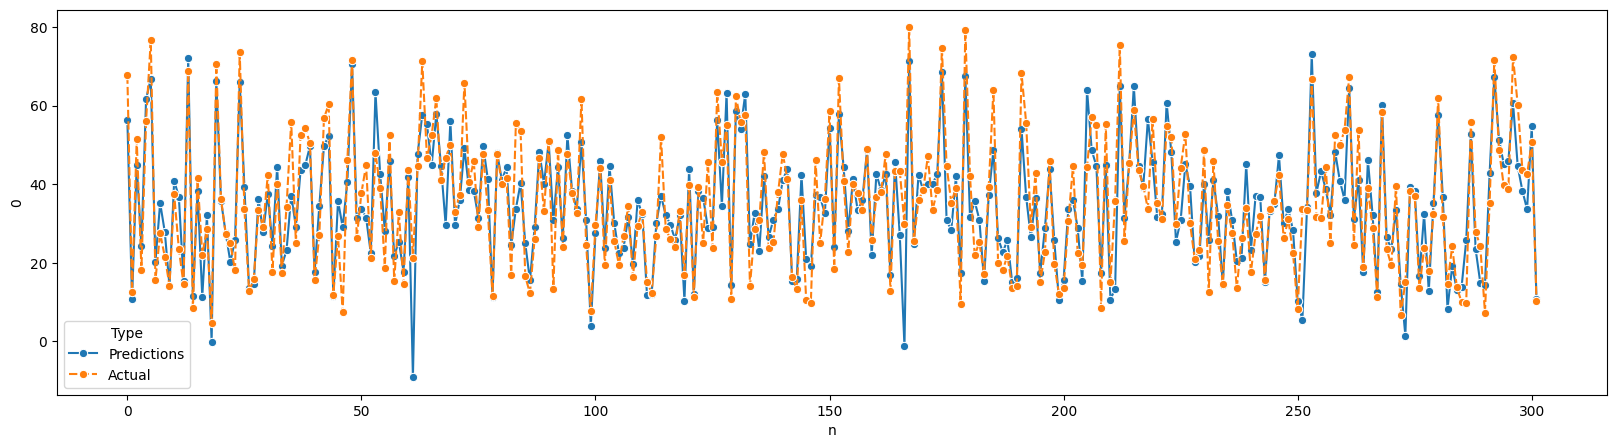

,Multiple Regression,Ridge,Polynomial Regression
Metrics,,,
Root Mean Squared Error (RMSE),9.724667,9.728210,7.977082
Mean Absolute Error (MAE),7.712430,7.716194,6.102560
Mean Squared Error (MSE),94.569156,94.638066,63.633840
R2 score,0.670997,0.670758,0.778620
CV-mean,0.496780,0.496955,0.496780


In [22]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

train_X_poly, test_X_poly, train_y_poly, test_y_poly = train_test_split(X_poly, y, test_size = 0.3, random_state = 16)
train_y_poly = train_y_poly[target_col[0]]
test_y_poly = test_y_poly[target_col[0]]

plr = LinearRegression()
evaluation, cv_scores = evaluate_model("Polynomial Regression", train_X_poly, train_y_poly, test_X_poly, test_y_poly,  "Coefs", plr, plot=False)
evaluation.set_index("Metrics")

[0.086924   0.65602716 0.55788836 0.62967804 0.65898998 0.43323068
 0.44297821 0.68772654 0.24620386 0.56814977]
Average score: 50.0%


C:\Users\VENKA\AppData\Local\Temp\ipykernel_32576\4287075302.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cv_scores);


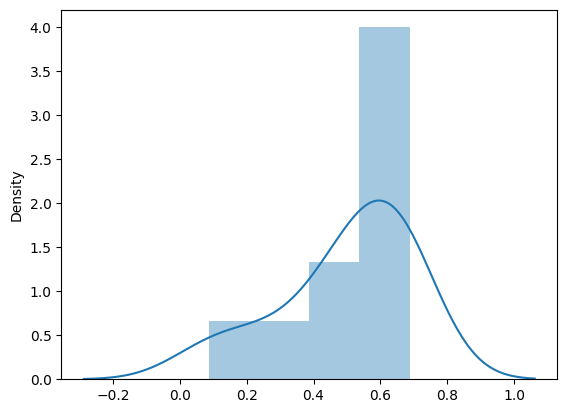

In [23]:
print(cv_scores)
sns.distplot(cv_scores);
print(f"Average score: {round(cv_scores.mean(),2)*100}%")

Score: 0.6454525992875771
Intercept: [38.39478462]


c:\Users\VENKA\Desktop\Data Science\Project\concrete\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VENKA\Desktop\Data Science\Project\concrete\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VENKA\Desktop\Data Science\Project\concrete\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VENKA\Desktop\Data Science\Project\concrete\venv\lib\site-packages\sklearn\utils\validation.py

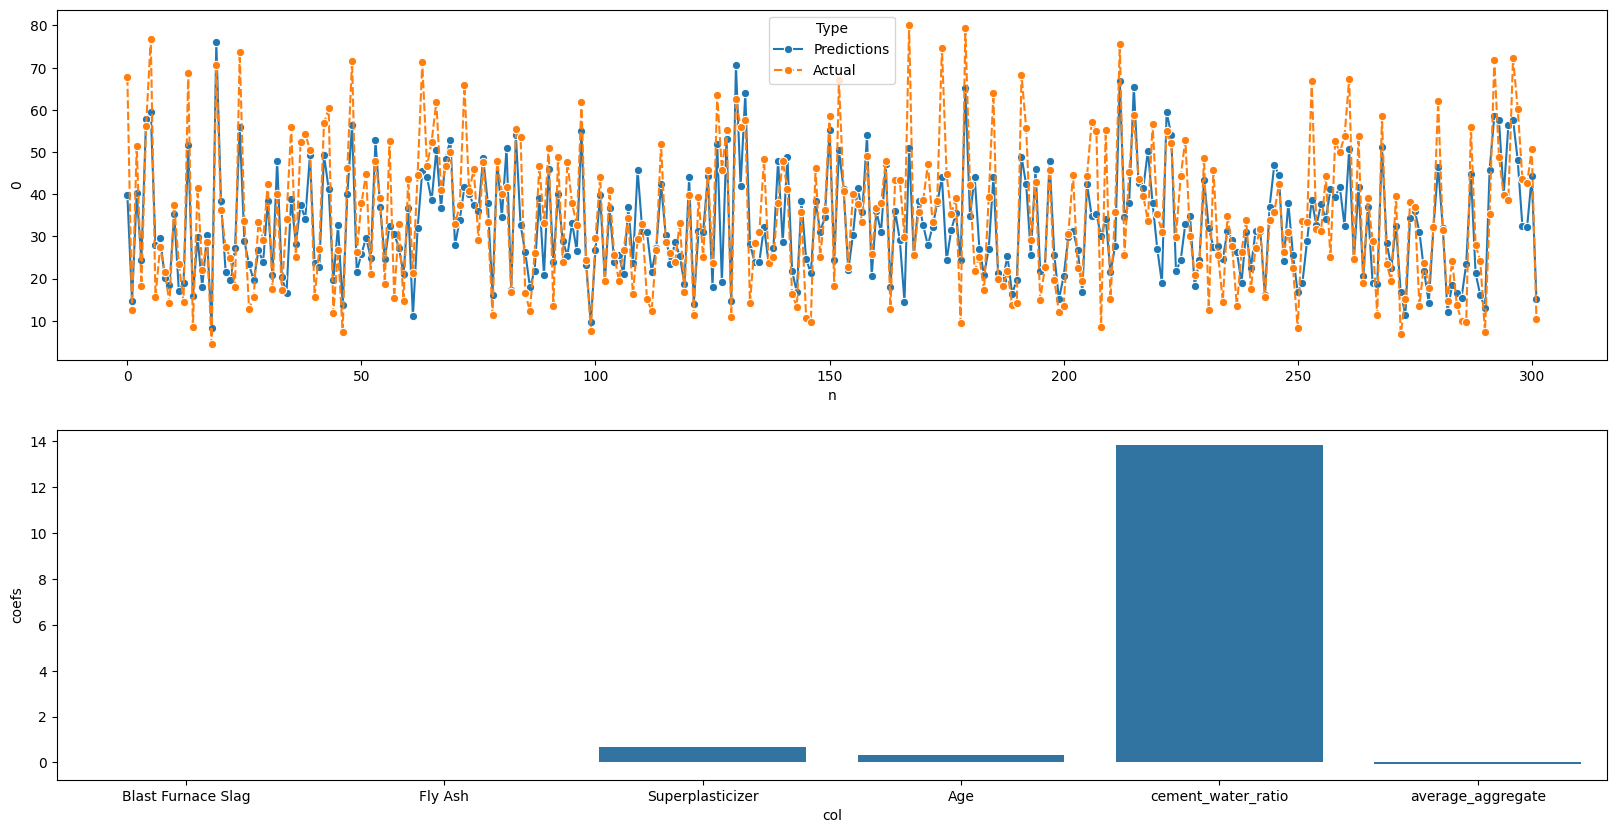

,Multiple Regression,Ridge,Polynomial Regression,Support Vector Regression
Metrics,,,,
Root Mean Squared Error (RMSE),9.724667,9.728210,7.977082,10.095136
Mean Absolute Error (MAE),7.712430,7.716194,6.102560,7.806911
Mean Squared Error (MSE),94.569156,94.638066,63.633840,101.911765
R2 score,0.670997,0.670758,0.778620,0.645453
CV-mean,0.496780,0.496955,0.496780,0.501033


In [24]:
svr = SVR(C=10, kernel="linear")
evaluation, cv_scores = evaluate_model("Support Vector Regression", train_X, train_y, test_X, test_y, "Coefs", svr)
evaluation.set_index("Metrics")

Score: 0.7214687401910007


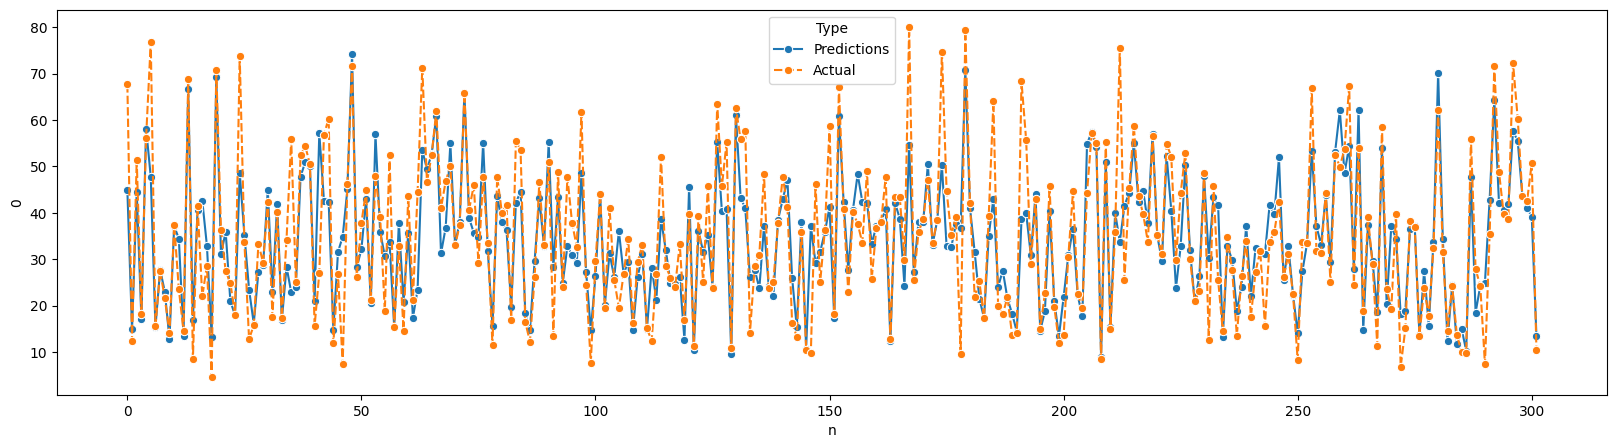

,Multiple Regression,Ridge,Polynomial Regression,Support Vector Regression,KNN
Metrics,,,,,
Root Mean Squared Error (RMSE),9.724667,9.728210,7.977082,10.095136,8.947712
Mean Absolute Error (MAE),7.712430,7.716194,6.102560,7.806911,5.894220
Mean Squared Error (MSE),94.569156,94.638066,63.633840,101.911765,80.061544
R2 score,0.670997,0.670758,0.778620,0.645453,0.721469
CV-mean,0.496780,0.496955,0.496780,0.501033,0.275710


In [25]:
knn = KNeighborsRegressor(n_neighbors=4, metric="manhattan", weights="distance")
evaluation, cv_scores = evaluate_model("KNN", train_X, train_y, test_X, test_y, "Coefs", knn, plot=False)
evaluation.set_index("Metrics")

Score: 0.8378351913654432


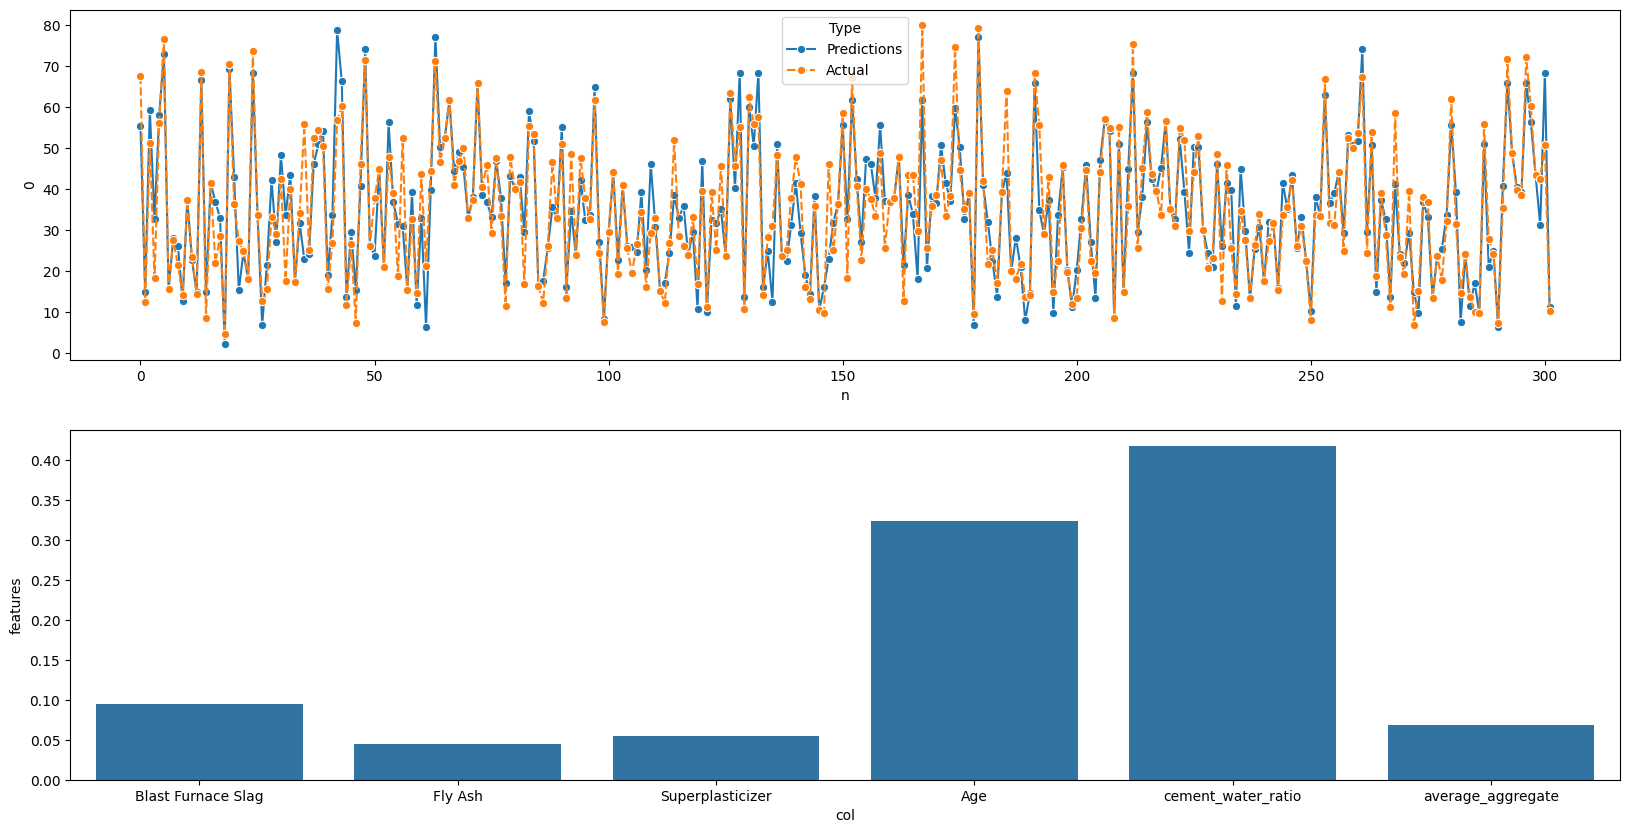

,Multiple Regression,Ridge,Polynomial Regression,Support Vector Regression,KNN,Decision Tree Regression
Metrics,,,,,,
Root Mean Squared Error (RMSE),9.724667,9.728210,7.977082,10.095136,8.947712,6.827368
Mean Absolute Error (MAE),7.712430,7.716194,6.102560,7.806911,5.894220,4.674067
Mean Squared Error (MSE),94.569156,94.638066,63.633840,101.911765,80.061544,46.612955
R2 score,0.670997,0.670758,0.778620,0.645453,0.721469,0.837835
CV-mean,0.496780,0.496955,0.496780,0.501033,0.275710,0.461216


In [26]:
dtr = DecisionTreeRegressor()
evaluation, cv_scores = evaluate_model("Decision Tree Regression", train_X, train_y, test_X, test_y, "Features", dtr)
evaluation.set_index("Metrics")

Score: 0.8945069099188897


c:\Users\VENKA\Desktop\Data Science\Project\concrete\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VENKA\Desktop\Data Science\Project\concrete\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VENKA\Desktop\Data Science\Project\concrete\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VENKA\Desktop\Data Science\Project\concrete\venv\lib\site-packages\sklearn\base.py:1152:

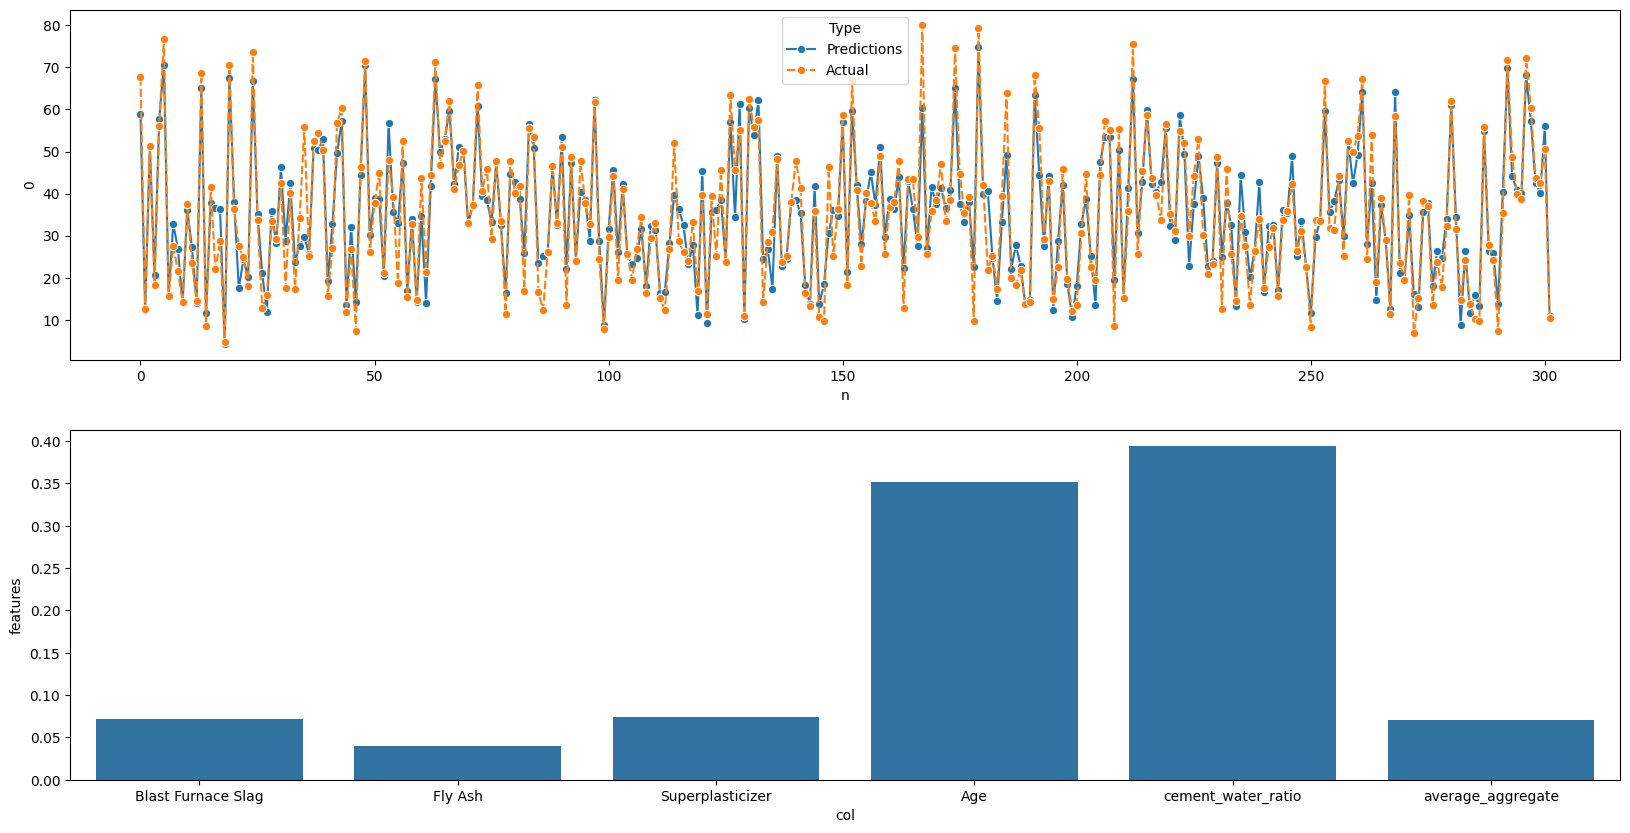

,Multiple Regression,Ridge,Polynomial Regression,Support Vector Regression,KNN,Decision Tree Regression,Random Forest Regression
Metrics,,,,,,,
Root Mean Squared Error (RMSE),9.724667,9.728210,7.977082,10.095136,8.947712,6.827368,5.506644
Mean Absolute Error (MAE),7.712430,7.716194,6.102560,7.806911,5.894220,4.674067,4.055328
Mean Squared Error (MSE),94.569156,94.638066,63.633840,101.911765,80.061544,46.612955,30.323130
R2 score,0.670997,0.670758,0.778620,0.645453,0.721469,0.837835,0.894507
CV-mean,0.496780,0.496955,0.496780,0.501033,0.275710,0.461216,0.659880


In [27]:
rfr = RandomForestRegressor()
evaluation, cv_scores = evaluate_model("Random Forest Regression", train_X, train_y, test_X, test_y, "Features", rfr)
evaluation.set_index("Metrics")

Score: 0.9137249363184474


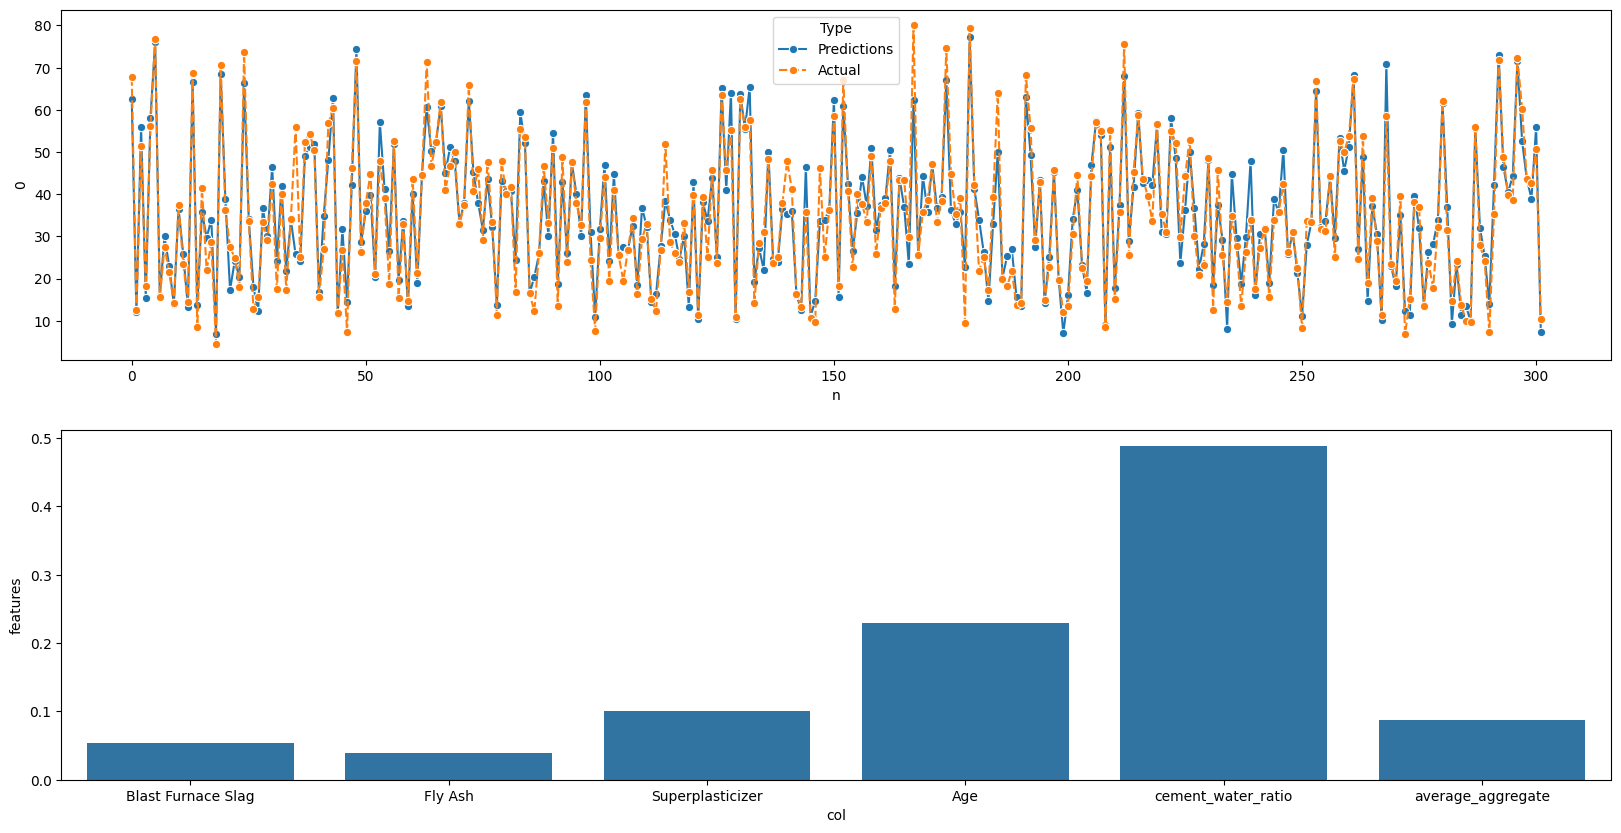

,Multiple Regression,Ridge,Polynomial Regression,Support Vector Regression,KNN,Decision Tree Regression,Random Forest Regression,XGBoost
Metrics,,,,,,,,
Root Mean Squared Error (RMSE),9.724667,9.728210,7.977082,10.095136,8.947712,6.827368,5.506644,4.979866
Mean Absolute Error (MAE),7.712430,7.716194,6.102560,7.806911,5.894220,4.674067,4.055328,3.589259
Mean Squared Error (MSE),94.569156,94.638066,63.633840,101.911765,80.061544,46.612955,30.323130,24.799065
R2 score,0.670997,0.670758,0.778620,0.645453,0.721469,0.837835,0.894507,0.913725
CV-mean,0.496780,0.496955,0.496780,0.501033,0.275710,0.461216,0.659880,0.641368


In [28]:
xgc = XGBRegressor()
evaluation, cv_scores = evaluate_model("XGBoost", train_X, train_y, test_X, test_y, "Features", xgc)
evaluation.set_index("Metrics")

In [29]:
model = XGBRegressor(n_jobs=4)

parameters = {
    'n_estimators': [50, 100, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'gamma': [0.001, 0.01],
    'learning_rate': [0.01, 0.1],
    'booster': ['gbtree']
}

grid_obj = GridSearchCV(
    estimator=xgc,
    param_grid=parameters
)

grid_obj.fit(X, y)

best_model = grid_obj.best_estimator_
print(best_model)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


c:\Users\VENKA\Desktop\Data Science\Project\concrete\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [17:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)


Score: 0.9281703042924389


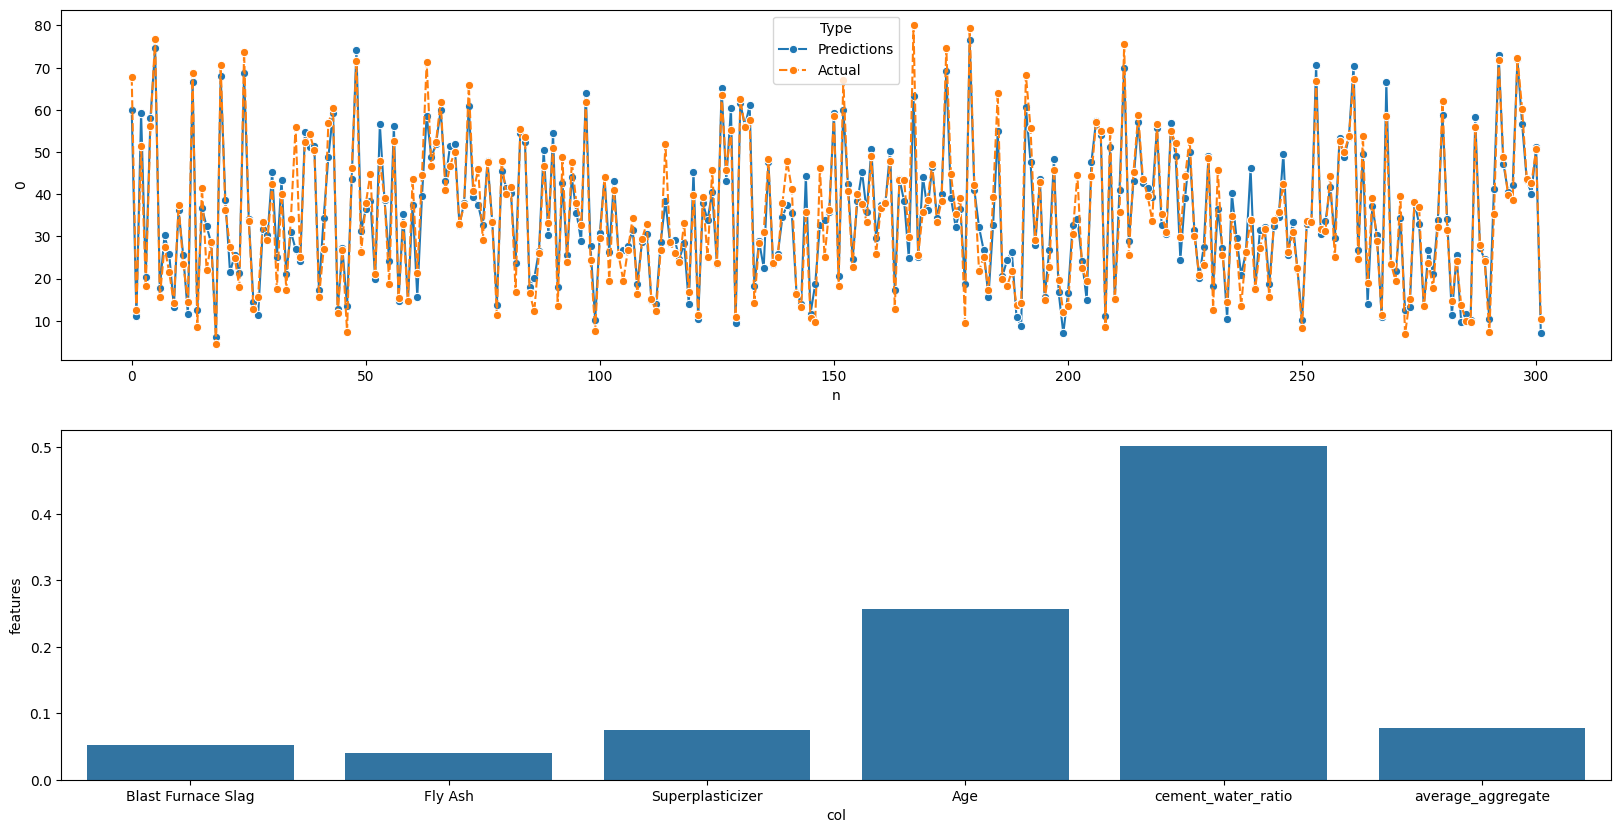

,Multiple Regression,Ridge,Polynomial Regression,Support Vector Regression,KNN,Decision Tree Regression,Random Forest Regression,XGBoost,XGBoost Tuned
Metrics,,,,,,,,,
Root Mean Squared Error (RMSE),9.724667,9.728210,7.977082,10.095136,8.947712,6.827368,5.506644,4.979866,4.543882
Mean Absolute Error (MAE),7.712430,7.716194,6.102560,7.806911,5.894220,4.674067,4.055328,3.589259,3.252299
Mean Squared Error (MSE),94.569156,94.638066,63.633840,101.911765,80.061544,46.612955,30.323130,24.799065,20.646861
R2 score,0.670997,0.670758,0.778620,0.645453,0.721469,0.837835,0.894507,0.913725,0.928170
CV-mean,0.496780,0.496955,0.496780,0.501033,0.275710,0.461216,0.659880,0.641368,0.653574


In [30]:
xgc = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
evaluation, cv_scores =  evaluate_model("XGBoost Tuned", train_X, train_y, test_X, test_y, "Features", xgc)
evaluation.set_index("Metrics")

In [31]:
import pickle
pickle.dump(xgc, open('model.pkl', 'wb'))